En este notebook realizaremos un análisis exploratorio de datos que incluirá:
1. Carga y visualización de datos
2. Análisis univariado
3. Análisis multivariado
4. Limpieza y preparación de datos
5. Codificación de etiquetas (Label Encoding)
6. Codificación One-Hot
7. Imputación de valores faltantes

1. Carga y visualización de datos

In [1]:
# Importar librerías
# Primero, cargamos las librerías necesarias y el conjunto de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
from google.colab import files
uploaded = files.upload()


Saving Compras.XLSX to Compras.XLSX


In [44]:
# Validar que el archivo este cargado
import os
os.listdir()

['.config', 'Compras.XLSX', 'sample_data']

In [45]:
#Realizamos la lectura del datframe
!pip install pandas openpyxl
df = pd.read_excel('Compras.XLSX')

In [46]:
# Visualizar las primeras filas del dataset
df.head()

,Centro,Grupo de compras,Fecha documento,Cl.documento compras,Documento compras,Posición,Indicador de borrado,Nombre del proveedor,Material,Texto breve,Cantidad de pedido,Unidad medida pedido,Precio neto,Valor neto de pedido,Moneda,Por entregar (cantidad),Por entregar (valor),Tipo de posición,Número de necesidad
0,4500.0,S02,2024-08-31,ZSOE,3710053935,10.0,NaN,2000123768 MADEPAL SAS,1408725.0,ESTIBA BASTIDOR REINMUNIZADA (1.00*1.20),140.0,U,30701.0,4298140.0,COP,0.0,0.0,NaN,NaN
1,4500.0,S01,2024-08-31,ZSON,3710053936,10.0,NaN,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD,19.0,361.0,NaN,NaN
2,4500.0,S01,2024-08-31,ZSON,3710053936,20.0,NaN,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD,19.0,361.0,NaN,NaN
3,4500.0,S01,2024-08-31,ZSON,3710053937,10.0,NaN,2000123607 KAESER COMPRESORES DE CO,1420965.0,FILTRO DE AIRE P/N 6.4143.0,1.0,U,645080.4,645080.4,COP,1.0,645080.4,NaN,NaN
4,4500.0,S01,2024-08-31,ZSON,3710053937,20.0,NaN,2000123607 KAESER COMPRESORES DE CO,1578067.0,DRANAJE AUTO. ECO-DRAIN 30 KAESER,1.0,U,690413.4,690413.4,COP,1.0,690413.4,NaN,NaN


In [47]:
#Visualizamos las ultimas 5 filas
df.tail()

,Centro,Grupo de compras,Fecha documento,Cl.documento compras,Documento compras,Posición,Indicador de borrado,Nombre del proveedor,Material,Texto breve,Cantidad de pedido,Unidad medida pedido,Precio neto,Valor neto de pedido,Moneda,Por entregar (cantidad),Por entregar (valor),Tipo de posición,Número de necesidad
55284,4500.0,S09,2022-01-03,ZSOS,6580004772,40.0,NaN,4500 Sucroal S.A. - Cítrico,16885.0,ACIDO CITRICO FINO * 50 LB [50 SACOS],226.8,KG,0.0,0.0,COP,0.0,0.0,V,NaN
55285,4500.0,S09,2022-01-03,ZSOS,6580004773,10.0,NaN,4500 Sucroal S.A. - Cítrico,20562.0,ACIDO CITRICO GRANULAR * 1000 KG (D),11000.0,KG,0.0,0.0,COP,0.0,0.0,V,NaN
55286,4500.0,S09,2022-01-03,ZSOS,6580004773,20.0,NaN,4500 Sucroal S.A. - Cítrico,20562.0,ACIDO CITRICO GRANULAR * 1000 KG (D),7000.0,KG,0.0,0.0,COP,0.0,0.0,V,NaN
55287,4500.0,S09,2022-01-03,ZSOS,6580004774,10.0,NaN,4500 Sucroal S.A. - Cítrico,20562.0,ACIDO CITRICO GRANULAR * 1000 KG (D),20000.0,KG,0.0,0.0,COP,0.0,0.0,V,NaN
55288,4500.0,S09,2022-01-03,ZSOS,6580004774,20.0,NaN,4500 Sucroal S.A. - Cítrico,20562.0,ACIDO CITRICO GRANULAR * 1000 KG (D),12000.0,KG,0.0,0.0,COP,0.0,0.0,V,NaN


In [48]:
# Validamos el tamaño del dataframe
df.shape

(55289, 19)

In [49]:
# Validamos el tamaño del dataframe de otra forma
num_rows, num_cols = df.shape
print(f"Número de filas: {num_rows}")
print(f"Número de columnas: {num_cols}")

Número de filas: 55289
Número de columnas: 19


In [50]:
# Validamos el tipo de datos de cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55289 entries, 0 to 55288
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Centro                   55288 non-null  float64       
 1   Grupo de compras         55289 non-null  object        
 2   Fecha documento          55289 non-null  datetime64[ns]
 3   Cl.documento compras     55289 non-null  object        
 4   Documento compras        55289 non-null  int64         
 5   Posición                 55287 non-null  float64       
 6   Indicador de borrado     1653 non-null   object        
 7   Nombre del proveedor     55289 non-null  object        
 8   Material                 29122 non-null  float64       
 9   Texto breve              55289 non-null  object        
 10  Cantidad de pedido       55289 non-null  float64       
 11  Unidad medida pedido     55289 non-null  object        
 12  Precio neto              55289 n

In [51]:
# Ver valores nulos
df.isnull().sum()

,0
Centro,1
Grupo de compras,0
Fecha documento,0
Cl.documento compras,0
Documento compras,0
Posición,2
Indicador de borrado,53636
Nombre del proveedor,0
Material,26167
Texto breve,0


2. Análisis univariado

In [52]:
# Estadísticas descriptivas
df.describe()

,Centro,Fecha documento,Documento compras,Posición,Material,Cantidad de pedido,Precio neto,Valor neto de pedido,Por entregar (cantidad),Por entregar (valor)
count,55288.000000,55289,5.528900e+04,55287.000000,2.912200e+04,5.528900e+04,5.528900e+04,5.528900e+04,5.528900e+04,5.528900e+04
mean,4515.460859,2023-04-20 08:34:09.217746688,4.155104e+09,20.268761,1.273765e+06,6.771478e+03,3.611645e+06,7.980415e+06,4.175450e+02,8.079147e+05
min,4500.000000,2022-01-03 00:00:00,3.710034e+09,1.000000,1.362700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4500.000000,2022-08-22 00:00:00,3.710042e+09,1.000000,1.385692e+06,1.000000e+00,1.028000e+04,1.204080e+05,0.000000e+00,0.000000e+00
50%,4500.000000,2023-04-14 00:00:00,3.710051e+09,10.000000,1.397651e+06,1.000000e+00,1.748573e+05,4.568900e+05,0.000000e+00,0.000000e+00
75%,4500.000000,2023-12-12 00:00:00,4.500102e+09,20.000000,1.472826e+06,1.800000e+01,7.500000e+05,1.457990e+06,0.000000e+00,0.000000e+00
max,4800.000000,2024-08-31 00:00:00,6.580006e+09,790.000000,1.719225e+06,3.000000e+06,9.917895e+08,1.071520e+10,2.500000e+06,9.820275e+08
std,37.797076,NaN,7.486785e+08,41.758472,4.830784e+05,7.406114e+04,4.042890e+07,9.304281e+07,2.174353e+04,2.156822e+07


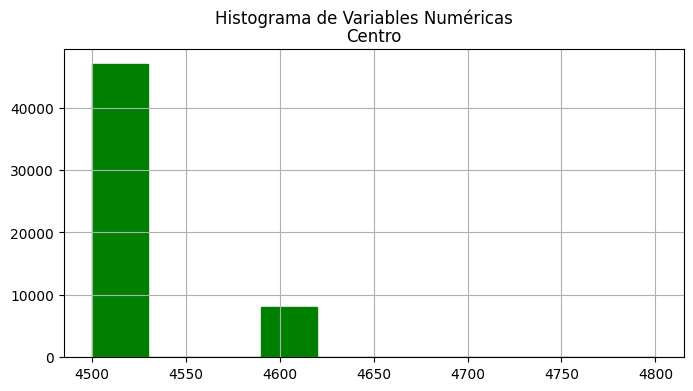

In [53]:
# Histograma de variables numéricas - Cantidad de OC por planta
num_cols = ['Centro']
df[num_cols].hist(figsize=(8, 4), bins=10, edgecolor='green', color='green')
plt.suptitle('Histograma de Variables Numéricas')
plt.show()

<ipython-input-54-b708b7d7443c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




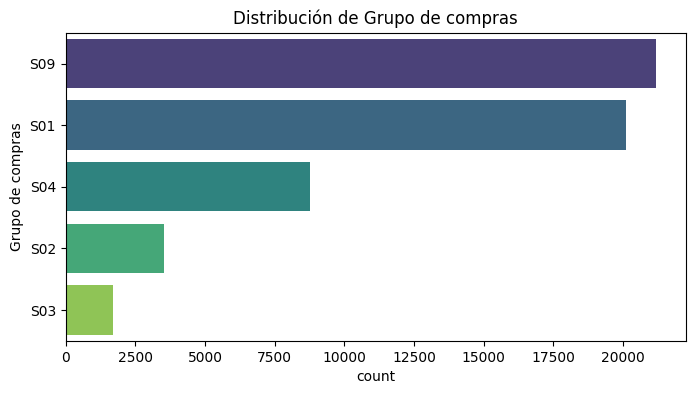

<ipython-input-54-b708b7d7443c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




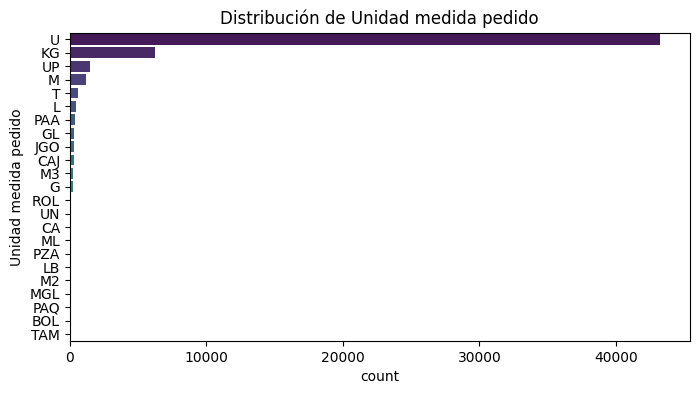

<ipython-input-54-b708b7d7443c>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




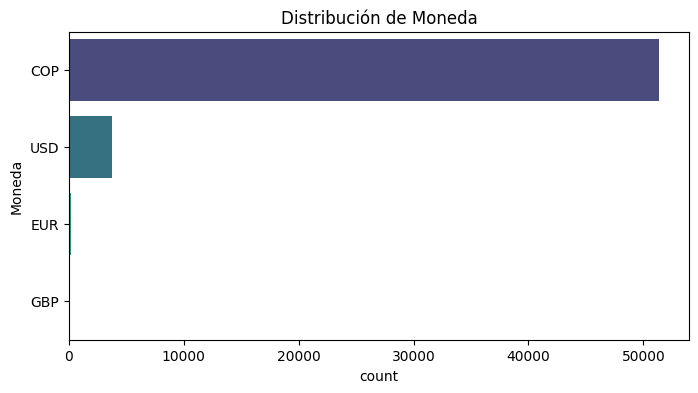

In [54]:
# Grafico de barra para - grupo de compras - unidad de medida - moneda
cat_cols = ['Grupo de compras', 'Unidad medida pedido', 'Moneda']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], palette='viridis', order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()


3. Análisis multivariado

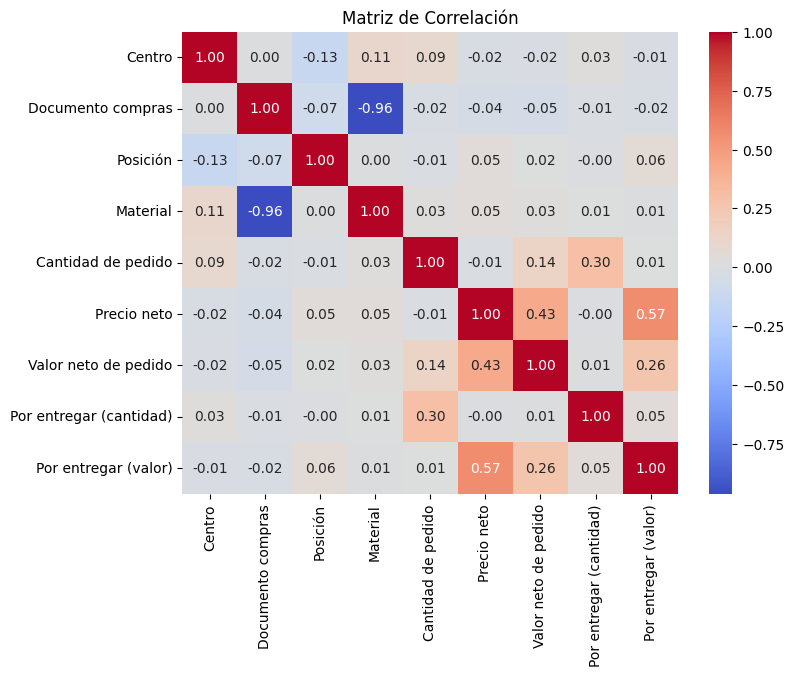

In [55]:
# Matriz de correlación entre variables numericas
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [56]:
# Gráfico de dispersión entre 'Cantidad de pedido' y 'Valor neto de pedido'
fig = px.scatter(df,
                 x='Cantidad de pedido',
                 y='Valor neto de pedido',
                 color='Moneda',
                 symbol='Grupo de compras',
                 labels={'Cantidad de pedido': 'Cantidad de Pedido',
                         'Valor neto de pedido': 'Valor Neto de Pedido',
                         'Moneda': 'Moneda',
                         'Grupo de compras': 'Grupo de Compras'},
                 title='Dispersión de Cantidad de Pedido vs Valor Neto de Pedido')

# Configurar el diseño para mejor visualización
fig.update_layout(xaxis_title='Cantidad de Pedido',
                  yaxis_title='Valor Neto de Pedido',
                  legend_title='Moneda y Grupo de Compras',
                  title_x=0.5)  # Centrar el título

# Mostrar el gráfico interactivo
fig.show()

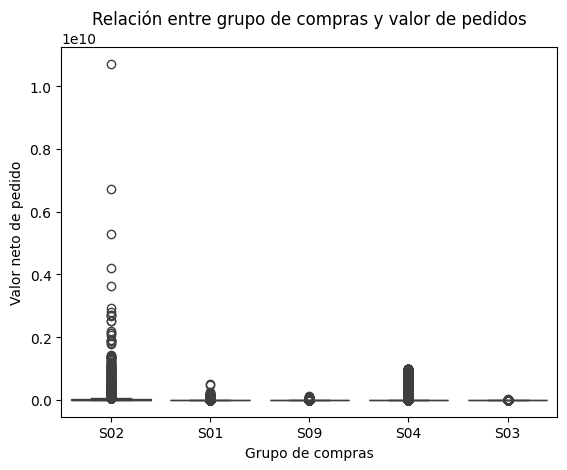

In [57]:
# Relación entre una variable categórica y una numérica
sns.boxplot(x='Grupo de compras', y='Valor neto de pedido', data=df)
plt.title('Relación entre grupo de compras y valor de pedidos')
plt.show()

4. Limpieza y preparación de datos

In [58]:
# Comprobar valores faltantes
df.isnull().sum()

,0
Centro,1
Grupo de compras,0
Fecha documento,0
Cl.documento compras,0
Documento compras,0
Posición,2
Indicador de borrado,53636
Nombre del proveedor,0
Material,26167
Texto breve,0


In [59]:
#Borramos las columnas que no son necesarias para el análisis

df = df.drop(columns=[
    'Cl.documento compras',
    'Posición',
    'Indicador de borrado',
    'Por entregar (cantidad)',
    'Por entregar (valor)',
    'Tipo de posición',
    'Número de necesidad'
])

In [60]:
df.head()

,Centro,Grupo de compras,Fecha documento,Documento compras,Nombre del proveedor,Material,Texto breve,Cantidad de pedido,Unidad medida pedido,Precio neto,Valor neto de pedido,Moneda
0,4500.0,S02,2024-08-31,3710053935,2000123768 MADEPAL SAS,1408725.0,ESTIBA BASTIDOR REINMUNIZADA (1.00*1.20),140.0,U,30701.0,4298140.0,COP
1,4500.0,S01,2024-08-31,3710053936,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD
2,4500.0,S01,2024-08-31,3710053936,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD
3,4500.0,S01,2024-08-31,3710053937,2000123607 KAESER COMPRESORES DE CO,1420965.0,FILTRO DE AIRE P/N 6.4143.0,1.0,U,645080.4,645080.4,COP
4,4500.0,S01,2024-08-31,3710053937,2000123607 KAESER COMPRESORES DE CO,1578067.0,DRANAJE AUTO. ECO-DRAIN 30 KAESER,1.0,U,690413.4,690413.4,COP


In [61]:
#Eliminar las filas de compra de servicio S04 y S09
df = df[~df['Grupo de compras'].isin(['S04', 'S09'])]
df.head()


,Centro,Grupo de compras,Fecha documento,Documento compras,Nombre del proveedor,Material,Texto breve,Cantidad de pedido,Unidad medida pedido,Precio neto,Valor neto de pedido,Moneda
0,4500.0,S02,2024-08-31,3710053935,2000123768 MADEPAL SAS,1408725.0,ESTIBA BASTIDOR REINMUNIZADA (1.00*1.20),140.0,U,30701.0,4298140.0,COP
1,4500.0,S01,2024-08-31,3710053936,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD
2,4500.0,S01,2024-08-31,3710053936,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD
3,4500.0,S01,2024-08-31,3710053937,2000123607 KAESER COMPRESORES DE CO,1420965.0,FILTRO DE AIRE P/N 6.4143.0,1.0,U,645080.4,645080.4,COP
4,4500.0,S01,2024-08-31,3710053937,2000123607 KAESER COMPRESORES DE CO,1578067.0,DRANAJE AUTO. ECO-DRAIN 30 KAESER,1.0,U,690413.4,690413.4,COP


In [62]:
# Validamos el tamaño del dataframe
df.shape

(25343, 12)

In [63]:
# Comprobar valores faltantes
df.isnull().sum()

,0
Centro,0
Grupo de compras,0
Fecha documento,0
Documento compras,0
Nombre del proveedor,0
Material,1
Texto breve,0
Cantidad de pedido,0
Unidad medida pedido,0
Precio neto,0


In [69]:
# Borramos datos nulos ya que son pocos
df = df.dropna(subset=['Material'])

In [70]:
df.isnull().sum()

,0
Centro,0
Grupo de compras,0
Fecha documento,0
Documento compras,0
Nombre del proveedor,0
Material,0
Texto breve,0
Cantidad de pedido,0
Unidad medida pedido,0
Precio neto,0


In [82]:
from scipy import stats

# Función para eliminar outliers usando Z-Score
def remove_outliers_zscore(df, column_name, threshold=3):
    z_scores = stats.zscore(df[column_name])
    abs_z_scores = np.abs(z_scores)
    df_filtered = df[abs_z_scores < threshold]
    return df_filtered

# Aplicar la función para 'Valor neto de pedido' y 'Cantidad de pedido'
df_cleaned_zscore = remove_outliers_zscore(df, 'Valor neto de pedido')
df_cleaned_zscore = remove_outliers_zscore(df_cleaned_zscore, 'Cantidad de pedido')

df_cleaned_zscore.head()

,Centro,Grupo de compras,Fecha documento,Documento compras,Nombre del proveedor,Material,Texto breve,Cantidad de pedido,Unidad medida pedido,Precio neto,Valor neto de pedido,Moneda
0,4500.0,1,2024-08-31,3710053935,2000123768 MADEPAL SAS,1408725.0,ESTIBA BASTIDOR REINMUNIZADA (1.00*1.20),140.0,U,30701.0,4298140.0,COP
1,4500.0,0,2024-08-31,3710053936,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD
2,4500.0,0,2024-08-31,3710053936,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD
3,4500.0,0,2024-08-31,3710053937,2000123607 KAESER COMPRESORES DE CO,1420965.0,FILTRO DE AIRE P/N 6.4143.0,1.0,U,645080.4,645080.4,COP
4,4500.0,0,2024-08-31,3710053937,2000123607 KAESER COMPRESORES DE CO,1578067.0,DRANAJE AUTO. ECO-DRAIN 30 KAESER,1.0,U,690413.4,690413.4,COP


In [83]:
# Gráfico de dispersión entre 'Cantidad de pedido' y 'Valor neto de pedido'
fig = px.scatter(df_cleaned_zscore,
                 x='Cantidad de pedido',
                 y='Valor neto de pedido',
                 color='Moneda',
                 symbol='Grupo de compras',
                 labels={'Cantidad de pedido': 'Cantidad de Pedido',
                         'Valor neto de pedido': 'Valor Neto de Pedido',
                         'Moneda': 'Moneda',
                         'Grupo de compras': 'Grupo de Compras'},
                 title='Dispersión de Cantidad de Pedido vs Valor Neto de Pedido')

# Configurar el diseño para mejor visualización
fig.update_layout(xaxis_title='Cantidad de Pedido',
                  yaxis_title='Valor Neto de Pedido',
                  legend_title='Moneda y Grupo de Compras',
                  title_x=0.5)  # Centrar el título

# Mostrar el gráfico interactivo
fig.show()

5. Preparación de los datos - (Label Encoding)

In [84]:
from sklearn.preprocessing import LabelEncoder

# Codificación de la columna 'Grupo de compras'
le_grupo = LabelEncoder()
df['Grupo de compras'] = le_grupo.fit_transform(df['Grupo de compras'])

df.head()

,Centro,Grupo de compras,Fecha documento,Documento compras,Nombre del proveedor,Material,Texto breve,Cantidad de pedido,Unidad medida pedido,Precio neto,Valor neto de pedido,Moneda
0,4500.0,1,2024-08-31,3710053935,2000123768 MADEPAL SAS,1408725.0,ESTIBA BASTIDOR REINMUNIZADA (1.00*1.20),140.0,U,30701.0,4298140.0,COP
1,4500.0,0,2024-08-31,3710053936,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD
2,4500.0,0,2024-08-31,3710053936,2000123992 TRITECH COLOMBIA SAS,1399956.0,"ACEITE CHAIN OIL 22,CASTROL P/CADENA",19.0,KG,19.0,361.0,USD
3,4500.0,0,2024-08-31,3710053937,2000123607 KAESER COMPRESORES DE CO,1420965.0,FILTRO DE AIRE P/N 6.4143.0,1.0,U,645080.4,645080.4,COP
4,4500.0,0,2024-08-31,3710053937,2000123607 KAESER COMPRESORES DE CO,1578067.0,DRANAJE AUTO. ECO-DRAIN 30 KAESER,1.0,U,690413.4,690413.4,COP


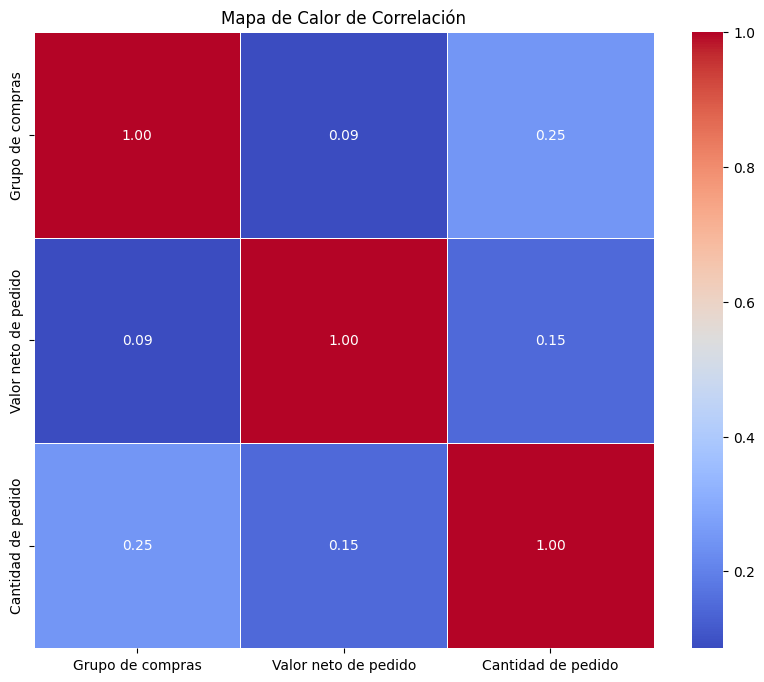

In [86]:
corr = df[['Grupo de compras', 'Valor neto de pedido', 'Cantidad de pedido']].corr()

# Crear mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

Una vez ejecutado la preparación de los datos, se puede concluir que no existe una correlación tan fuerte entre el grupo de compras y el valor o cantidad comprada, lo cual indica que el tipo de compra (repuestos, materias primas e importación) no incide en el valor o cantidad a comprar. Para este caso se eliminaron los outliers, se normalizo la columna de grupo de compras para hacer que el grupo de datos sea más homogeneo y menos disperso.